In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/1-desafio-cd-fatec-ourinhos/sample_submission.csv
/kaggle/input/1-desafio-cd-fatec-ourinhos/pipeline.png
/kaggle/input/1-desafio-cd-fatec-ourinhos/stat_descriptions.csv
/kaggle/input/1-desafio-cd-fatec-ourinhos/train.csv
/kaggle/input/1-desafio-cd-fatec-ourinhos/test.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df_train = pd.read_csv("../input/1-desafio-cd-fatec-ourinhos/train.csv", sep=";")
df_train.head()

,gs_id,gs_year,gs_team,gs_opp,gs_week_number,gs_game_day_of_week,gs_game_date,gs_game_time,gs_game_location,gs_week_num,...,ats_red_zone_scores,ats_red_zone_pct,ats_drives,ats_play_count_tip,ats_plays_per_drive,ats_yds_per_drive,ats_start_avg,ats_time_avg,ats_points_avg,winorlose
0,682,2013,Indianapolis Colts,New England Patriots,19,Sat,January 11,8:15PM ET,home,Division,...,36.0,55.4%,201.0,1179.0,5.9,30.6,Own 30.0,2:25,2.10,L
1,867,2013,San Diego Chargers,Cincinnati Bengals,18,Sun,January 5,1:06PM ET,home,Wild Card,...,34.0,73.9%,201.0,1119.0,5.6,29.2,Own 26.9,2:37,1.91,W
2,1120,2013,San Francisco 49ers,Carolina Panthers,19,Sun,January 12,1:05PM ET,home,Division,...,29.0,58.0%,170.0,1026.0,6.0,29.8,Own 29.4,3:00,1.99,W
3,738,2013,New England Patriots,Denver Broncos,19,Sun,January 19,3:06PM ET,home,Conf. Champ.,...,51.0,76.1%,202.0,1182.0,5.9,36.2,Own 28.3,2:25,2.83,L
4,868,2013,San Diego Chargers,Denver Broncos,19,Sun,January 12,4:40PM ET,home,Division,...,51.0,76.1%,202.0,1182.0,5.9,36.2,Own 28.3,2:25,2.83,L


In [4]:
# retirando os espaços dos nomes das colunas
Coluna_name=[]
for i in df_train:
    Coluna_name.append(i.strip()) 
df_train.columns = Coluna_name 

df_train.head()

,gs_id,gs_year,gs_team,gs_opp,gs_week_number,gs_game_day_of_week,gs_game_date,gs_game_time,gs_game_location,gs_week_num,...,ats_red_zone_scores,ats_red_zone_pct,ats_drives,ats_play_count_tip,ats_plays_per_drive,ats_yds_per_drive,ats_start_avg,ats_time_avg,ats_points_avg,winorlose
0,682,2013,Indianapolis Colts,New England Patriots,19,Sat,January 11,8:15PM ET,home,Division,...,36.0,55.4%,201.0,1179.0,5.9,30.6,Own 30.0,2:25,2.10,L
1,867,2013,San Diego Chargers,Cincinnati Bengals,18,Sun,January 5,1:06PM ET,home,Wild Card,...,34.0,73.9%,201.0,1119.0,5.6,29.2,Own 26.9,2:37,1.91,W
2,1120,2013,San Francisco 49ers,Carolina Panthers,19,Sun,January 12,1:05PM ET,home,Division,...,29.0,58.0%,170.0,1026.0,6.0,29.8,Own 29.4,3:00,1.99,W
3,738,2013,New England Patriots,Denver Broncos,19,Sun,January 19,3:06PM ET,home,Conf. Champ.,...,51.0,76.1%,202.0,1182.0,5.9,36.2,Own 28.3,2:25,2.83,L
4,868,2013,San Diego Chargers,Denver Broncos,19,Sun,January 12,4:40PM ET,home,Division,...,51.0,76.1%,202.0,1182.0,5.9,36.2,Own 28.3,2:25,2.83,L


In [5]:
# verificando a quantidade de linha e coluna
df_train.shape

(526, 263)

In [6]:
# colunas
df_train.columns

Index(['gs_id', 'gs_year', 'gs_team', 'gs_opp', 'gs_week_number',
       'gs_game_day_of_week', 'gs_game_date', 'gs_game_time',
       'gs_game_location', 'gs_week_num',
       ...
       'ats_red_zone_scores', 'ats_red_zone_pct', 'ats_drives',
       'ats_play_count_tip', 'ats_plays_per_drive', 'ats_yds_per_drive',
       'ats_start_avg', 'ats_time_avg', 'ats_points_avg', 'winorlose'],
      dtype='object', length=263)

In [7]:
df_train.isnull().sum()

gs_id                  0
gs_year                0
gs_team                0
gs_opp                 0
gs_week_number         0
                    ... 
ats_yds_per_drive    286
ats_start_avg        286
ats_time_avg         286
ats_points_avg       286
winorlose              0
Length: 263, dtype: int64

In [8]:
# tipo dos dados
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Columns: 263 entries, gs_id to winorlose
dtypes: float64(128), int64(111), object(24)
memory usage: 1.1+ MB


In [9]:
df_train.select_dtypes(np.object)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,gs_team,gs_opp,gs_game_day_of_week,gs_game_date,gs_game_time,gs_game_location,gs_week_num,hts_fg_perc,hts_xp_perc,hts_kickoff_tb_pct,...,hts_time_avg,ats_fg_perc,ats_xp_perc,ats_kickoff_tb_pct,ats_third_down_pct,ats_fourth_down_pct,ats_red_zone_pct,ats_start_avg,ats_time_avg,winorlose
0,Indianapolis Colts,New England Patriots,Sat,January 11,8:15PM ET,home,Division,87.5%,100.0%,46.6%,...,2:32,92.7%,100.0%,65.7%,37.6%,46.7%,55.4%,Own 30.0,2:25,L
1,San Diego Chargers,Cincinnati Bengals,Sun,January 5,1:06PM ET,home,Wild Card,91.9%,100.0%,19.6%,...,3:13,81.8%,98.1%,37.2%,40.9%,57.1%,73.9%,Own 26.9,2:37,W
2,San Francisco 49ers,Carolina Panthers,Sun,January 12,1:05PM ET,home,Division,88.9%,100.0%,41.3%,...,2:36,88.9%,100.0%,76.8%,43.8%,76.9%,58.0%,Own 29.4,3:00,W
3,New England Patriots,Denver Broncos,Sun,January 19,3:06PM ET,home,Conf. Champ.,92.7%,100.0%,65.7%,...,2:25,96.2%,100.0%,70.4%,46.3%,88.9%,76.1%,Own 28.3,2:25,L
4,San Diego Chargers,Denver Broncos,Sun,January 12,4:40PM ET,home,Division,91.9%,100.0%,19.6%,...,3:13,96.2%,100.0%,70.4%,46.3%,88.9%,76.1%,Own 28.3,2:25,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Minnesota Vikings,San Francisco 49ers,Sat,January 6,4:00PM ET,home,Division,72.7%,97.2%,NaN,...,NaN,80.6%,96.1%,NaN,NaN,NaN,NaN,NaN,NaN,L
522,Los Angeles Rams,San Francisco 49ers,Sun,January 14,5:00PM ET,home,Conf. Champ.,76.7%,100.0%,NaN,...,NaN,80.6%,96.1%,NaN,NaN,NaN,NaN,NaN,NaN,L
523,Buffalo Bills,Cleveland Browns,Sat,January 6,12:30PM ET,home,Division,76.7%,97.9%,NaN,...,NaN,66.7%,100.0%,NaN,NaN,NaN,NaN,NaN,NaN,L
524,Los Angeles Rams,Philadelphia Eagles,Sun,December 31,12:30PM ET,home,Wild Card,76.7%,100.0%,NaN,...,NaN,60.6%,100.0%,NaN,NaN,NaN,NaN,NaN,NaN,W


*Melhorando as colunas object*

In [10]:
#tentar limpar

'''df_train.columns(['ats_fg_perc','ats_xp_perc', 
         'ats_kickoff_tb_pct','ats_third_down_pct',
         'ats_fourth_down_pct','ats_red_zone_pct']).str.replace("%", "")'''

'df_train.columns([\'ats_fg_perc\',\'ats_xp_perc\', \n         \'ats_kickoff_tb_pct\',\'ats_third_down_pct\',\n         \'ats_fourth_down_pct\',\'ats_red_zone_pct\']).str.replace("%", "")'

In [11]:
#depois colocar como o type certo
'''df_train[['ats_fg_perc','ats_xp_perc', 
         'ats_kickoff_tb_pct','ats_third_down_pct',
         'ats_fourth_down_pct','ats_red_zone_pct']] = df_train[['ats_fg_perc','ats_xp_perc', 
         'ats_kickoff_tb_pct','ats_third_down_pct',
         'ats_fourth_down_pct','ats_red_zone_pct']].apply(pd.to_numeric)'''

"df_train[['ats_fg_perc','ats_xp_perc', \n         'ats_kickoff_tb_pct','ats_third_down_pct',\n         'ats_fourth_down_pct','ats_red_zone_pct']] = df_train[['ats_fg_perc','ats_xp_perc', \n         'ats_kickoff_tb_pct','ats_third_down_pct',\n         'ats_fourth_down_pct','ats_red_zone_pct']].apply(pd.to_numeric)"

In [12]:
df_train = df_train.drop(columns=['gs_game_date', 'gs_game_time',
                    'ats_fg_perc','ats_xp_perc', 'ats_kickoff_tb_pct','ats_third_down_pct',
                    'ats_fourth_down_pct','ats_red_zone_pct','hts_fg_perc', 'hts_xp_perc',
                    'hts_kickoff_tb_pct', 'hts_third_down_pct', 'hts_fourth_down_pct',
                    'hts_red_zone_pct', 'hts_start_avg', 'hts_time_avg', 'ats_start_avg', 'ats_time_avg'])


In [13]:
df_train.shape

(526, 245)

Os dados estão bem desbalanceados 

L    340
W    186
Name: winorlose, dtype: int64


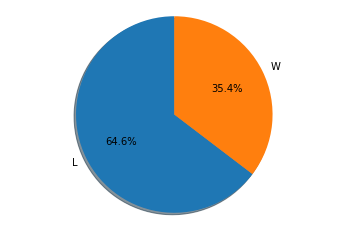

In [14]:
import matplotlib.pyplot as plt

print(df_train['winorlose'].value_counts())

labels = 'L','W'
sizes = df_train['winorlose'].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)

ax1.axis('equal')

plt.show()

Quantidade de L e W de cada time 

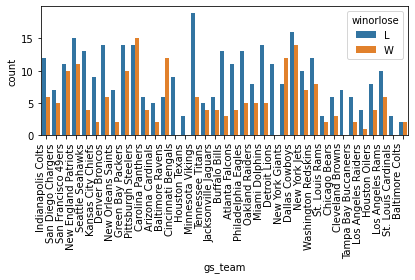

In [15]:
ax = sns.countplot(x="gs_team", hue="winorlose", data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Etapas do campeonato

<AxesSubplot:xlabel='gs_week_num', ylabel='count'>

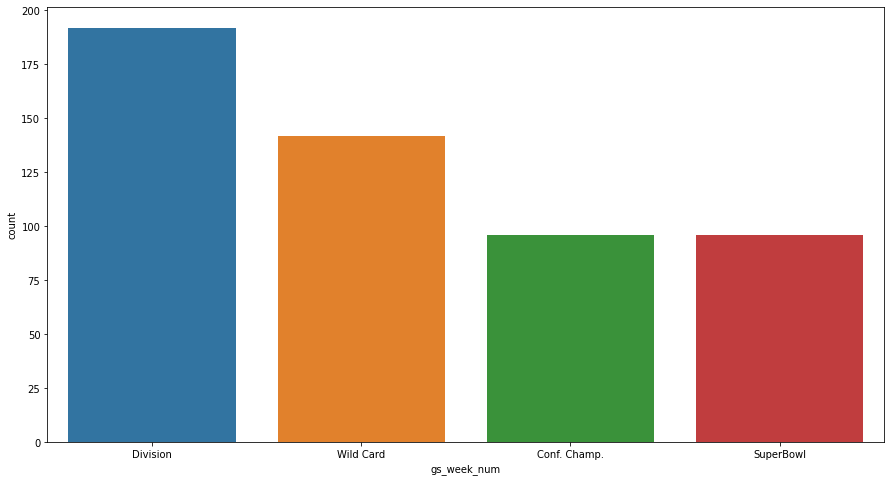

In [16]:
plt.figure(figsize = (15,8))
sns.countplot(x='gs_week_num', data=df_train, orient = 'h', order = df_train['gs_week_num'].value_counts().head().index)

Média de pontos dos times 

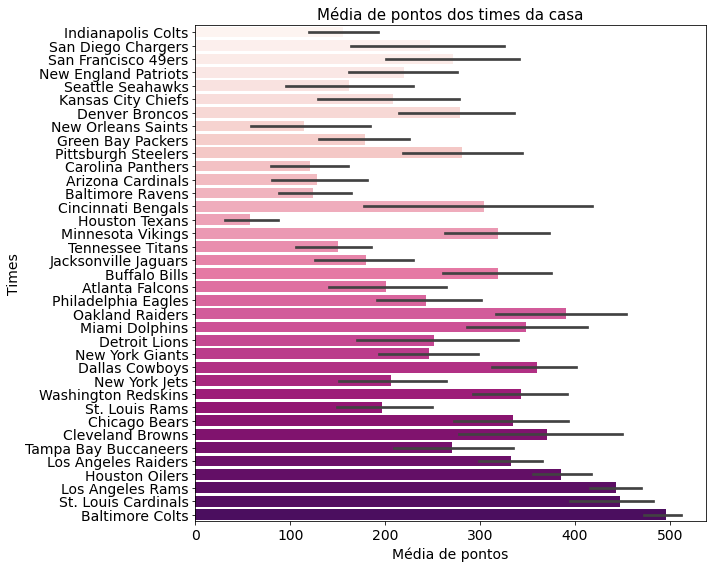

In [17]:
import matplotlib.pyplot as plt

#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(10,8))
#criando o gráfico de barras
sns.barplot(x=df_train['ats_points_avg'].index, y=df_train['gs_team'], ax=ax, data=df_train,     
            palette='RdPu')
#adicionando título
ax.set_title("Média de pontos dos times da casa", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax.set_xlabel('Média de pontos', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax.set_ylabel('Times', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)
#otimizar espaço da figure
fig.tight_layout();

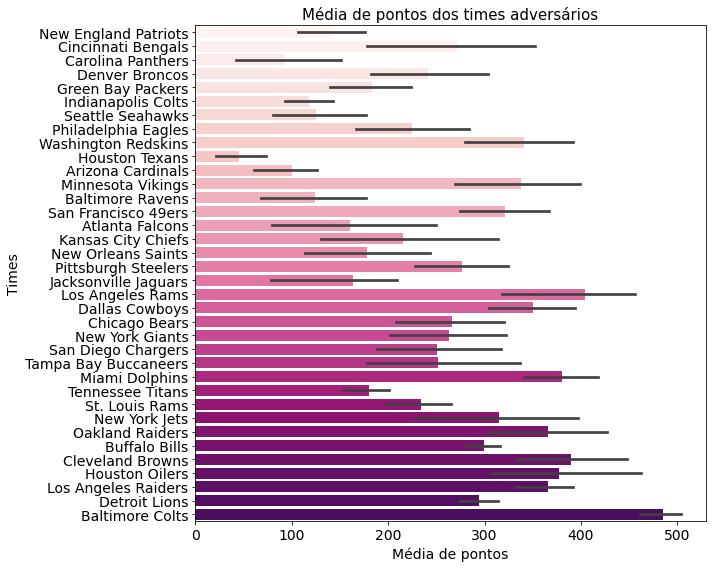

In [18]:
import matplotlib.pyplot as plt

#criando uma figure, axes, alterando tamanho
fig, ax = plt.subplots(figsize=(10,8))
#criando o gráfico de barras
sns.barplot(x=df_train['ats_points_avg'].index, y=df_train['gs_opp'], ax=ax, data=df_train,     
            palette='RdPu')
#adicionando título
ax.set_title("Média de pontos dos times adversários", fontdict={'fontsize':15})
#mudando nome e tamanho do label x
ax.set_xlabel('Média de pontos', fontdict={'fontsize':14})
#mudando nome e tamanho do label y
ax.set_ylabel('Times', fontdict={'fontsize':14})
#mudando tamanho dos labels dos ticks
ax.tick_params(labelsize=14)
#otimizar espaço da figure
fig.tight_layout();


Correlação

In [19]:
'''plt.figure(figsize=(10, 12))
sns.heatmap(df_train.corr(),
            annot = True,
            fmt = '.1f',
            linewidths=.6,
            cmap='Greens')
plt.title('Correlação dos dados')
plt.show()'''

"plt.figure(figsize=(10, 12))\nsns.heatmap(df_train.corr(),\n            annot = True,\n            fmt = '.1f',\n            linewidths=.6,\n            cmap='Greens')\nplt.title('Correlação dos dados')\nplt.show()"

Linhas duplicadas

In [20]:
# linhas duplicadas
print(df_train.duplicated())


0      False
1      False
2      False
3      False
4      False
       ...  
521    False
522    False
523    False
524    False
525    False
Length: 526, dtype: bool


Estatística Descritiva 

In [21]:
df_train.describe()

,gs_id,gs_year,gs_week_number,hts_id,hts_wins,hts_losses,hts_ties,hts_win_loss_perc,hts_points,hts_points_opp,...,ats_third_down_success,ats_fourth_down_att,ats_fourth_down_success,ats_red_zone_att,ats_red_zone_scores,ats_drives,ats_play_count_tip,ats_plays_per_drive,ats_yds_per_drive,ats_points_avg
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,238.000000,526.000000,526.000000,526.000000,...,324.000000,324.000000,324.000000,323.000000,323.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,14563.096958,1995.041825,18.098859,812.340304,10.437262,5.030418,0.126050,0.674962,366.739544,284.657795,...,87.666667,12.435185,6.604938,41.260062,23.535604,185.633333,1055.504167,5.704167,30.944583,2.100458
std,7048.293591,13.411657,1.880658,403.478471,1.674134,1.566016,0.345058,0.095295,63.699433,57.124899,...,10.332851,4.740850,3.357646,25.361251,15.414797,11.089166,55.259297,0.366573,3.945334,0.388976
min,682.000000,1970.000000,10.000000,32.000000,4.000000,0.000000,0.000000,0.438000,135.000000,128.000000,...,62.000000,3.000000,0.000000,0.000000,0.000000,141.000000,735.000000,4.800000,20.500000,1.130000
25%,8652.250000,1984.000000,18.000000,477.000000,9.000000,4.000000,0.000000,0.625000,326.000000,248.000000,...,81.000000,10.000000,4.000000,0.000000,0.000000,178.750000,1025.000000,5.500000,28.000000,1.835000
50%,14809.500000,1996.000000,18.000000,815.000000,10.000000,5.000000,0.000000,0.688000,366.000000,290.000000,...,89.000000,12.000000,6.000000,50.000000,27.000000,185.000000,1052.000000,5.700000,30.800000,2.095000
75%,20519.250000,2006.750000,19.000000,1146.000000,11.000000,6.000000,0.000000,0.750000,405.000000,326.000000,...,94.000000,14.250000,8.000000,60.000000,35.000000,193.000000,1091.000000,5.900000,33.900000,2.380000
max,26629.000000,2017.000000,21.000000,1538.000000,16.000000,9.000000,2.000000,1.000000,606.000000,471.000000,...,127.000000,34.000000,19.000000,75.000000,51.000000,217.000000,1226.000000,6.700000,42.600000,3.190000


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Columns: 245 entries, gs_id to winorlose
dtypes: float64(128), int64(111), object(6)
memory usage: 1006.9+ KB


**SPLIT EM TREINO E TESTE**

In [23]:
y = df_train['winorlose']
X = df_train.drop('winorlose', axis = 1)
X.head()

,gs_id,gs_year,gs_team,gs_opp,gs_week_number,gs_game_day_of_week,gs_game_location,gs_week_num,hts_id,hts_wins,...,ats_third_down_success,ats_fourth_down_att,ats_fourth_down_success,ats_red_zone_att,ats_red_zone_scores,ats_drives,ats_play_count_tip,ats_plays_per_drive,ats_yds_per_drive,ats_points_avg
0,682,2013,Indianapolis Colts,New England Patriots,19,Sat,home,Division,40,11,...,83.0,15.0,7.0,65.0,36.0,201.0,1179.0,5.9,30.6,2.10
1,867,2013,San Diego Chargers,Cincinnati Bengals,18,Sun,home,Wild Card,46,9,...,92.0,21.0,12.0,46.0,34.0,201.0,1119.0,5.6,29.2,1.91
2,1120,2013,San Francisco 49ers,Carolina Panthers,19,Sun,home,Division,61,12,...,91.0,13.0,10.0,50.0,29.0,170.0,1026.0,6.0,29.8,1.99
3,738,2013,New England Patriots,Denver Broncos,19,Sun,home,Conf. Champ.,32,12,...,95.0,9.0,8.0,67.0,51.0,202.0,1182.0,5.9,36.2,2.83
4,868,2013,San Diego Chargers,Denver Broncos,19,Sun,home,Division,46,9,...,95.0,9.0,8.0,67.0,51.0,202.0,1182.0,5.9,36.2,2.83


In [24]:
from sklearn.model_selection import train_test_split


trainX, valX, trainy, valy = train_test_split(X, y,
                                              test_size=0.3, 
                                              random_state=20,
                                              stratify = y)
valX.shape

(158, 244)

Variáveis Categóricas

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Columns: 244 entries, gs_id to ats_points_avg
dtypes: float64(128), int64(111), object(5)
memory usage: 1002.8+ KB


In [26]:
valy.shape

(158,)

In [27]:
valX.shape

(158, 244)

**TRATAMENTOS NO DADOS DE TREINO**

***Valores Faltantes***

*Variáveis Numéricas*

In [28]:
var_num = trainX.select_dtypes(np.number).columns
var_num = var_num.to_list()

In [29]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean') # strategy='median', strategy='most_frequent', (strategy='constant', fill_value = 0)
trainX[var_num] = imp.fit_transform(trainX[var_num])

In [30]:
valX[var_num] = imp.transform(valX[var_num])

In [31]:
valX.shape

(158, 244)

*Variáveis Categóricas*

In [32]:
var_cat = trainX .select_dtypes(exclude=np.number).columns
var_cat = var_cat.to_list()
var_cat

['gs_team', 'gs_opp', 'gs_game_day_of_week', 'gs_game_location', 'gs_week_num']

In [33]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = 0) 
trainX[var_cat] = imp_cat.fit_transform(trainX[var_cat])


In [34]:
valX[var_cat] = imp_cat.transform(valX[var_cat])

In [35]:
valX.shape

(158, 244)

**ENCODER**

In [36]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1) #faça a troca das categorias por números

trainX[var_cat] = encoder.fit_transform(trainX[var_cat]) #ltere somente as colunas categóricas do meu dataset


In [37]:
valX[var_cat] = encoder.transform(valX[var_cat])

In [38]:
valX.shape

(158, 244)

*Ainda tem alguma coisa nula?*

In [39]:
trainX.select_dtypes(np.number).isnull().sum()

gs_id                  0
gs_year                0
gs_team                0
gs_opp                 0
gs_week_number         0
                      ..
ats_drives             0
ats_play_count_tip     0
ats_plays_per_drive    0
ats_yds_per_drive      0
ats_points_avg         0
Length: 244, dtype: int64

Normalização

In [40]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

trainX = sc.fit_transform(trainX)


In [41]:
valX = sc.transform(valX)

In [42]:
valX.shape

(158, 244)

**FILTER SELECTION**

Modo 2 - biblioteca que escolhe as melhores features

In [43]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
trainy.shape

(368,)

In [45]:
trainy = trainy.apply(lambda x : 1 if (x == 'W') else 0)
trainy.head(10)

186    1
466    1
179    0
515    0
158    0
78     0
79     1
227    1
230    1
357    0
Name: winorlose, dtype: int64

In [46]:
trainy.shape

(368,)

In [47]:
valy.shape

(158,)

In [48]:
valy = valy.apply(lambda x : 1 if (x == 'W') else 0)
valy.head(10)

439    1
375    1
513    0
77     1
65     0
283    0
512    1
414    0
12     1
291    0
Name: winorlose, dtype: int64

In [49]:
valy.shape

(158,)

In [50]:
import lightgbm as lgb


k = 6
selector = SelectKBest(score_func = f_classif, k = k)

Xtrain2 = selector.fit_transform(trainX, trainy)
valX2 = selector.transform(valX)

#GradientBoosting
gb_clf = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.5, random_state = 42)
gb_clf.fit(Xtrain2, trainy)

# LightGBM 
clf = lgb.LGBMClassifier(max_depth = 15)
clf.fit(Xtrain2, trainy)
#RandomForest
modelo = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 0)
modelo.fit(Xtrain2, trainy)

p = gb_clf.predict(valX2)

score = mean_absolute_error(valy, p)
print('k = {} - MAE = {}'.format(k, score))


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [111 229] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


k = 6 - MAE = 0.33544303797468356


**RESOLVER DESBALANCEAMENTO**

**DADOS DE TESTE**

In [51]:
df_test = pd.read_csv("../input/1-desafio-cd-fatec-ourinhos/test.csv", sep=";")
df_test.head()

,gs_id,gs_year,gs_team,gs_opp,gs_week_number,gs_game_day_of_week,gs_game_date,gs_game_time,gs_game_location,gs_week_num,...,ats_red_zone_att,ats_red_zone_scores,ats_red_zone_pct,ats_drives,ats_play_count_tip,ats_plays_per_drive,ats_yds_per_drive,ats_start_avg,ats_time_avg,ats_points_avg
0,109,2018,Indianapolis Colts,Houston Texans,18,Sat,January 5,4:35PM ET,home,Wild Card,...,60.0,30.0,50.0%,186.0,1086.0,5.8,31.1,Own 31.3,2:39,2.03
1,19,2018,New England Patriots,Kansas City Chiefs,19,Sun,January 20,6:40PM ET,home,Conf. Champ.,...,71.0,51.0,71.8%,171.0,1030.0,6.0,39.8,Own 30.9,2:44,3.12
2,110,2018,Indianapolis Colts,Kansas City Chiefs,19,Sat,January 12,4:35PM ET,home,Division,...,71.0,51.0,71.8%,171.0,1030.0,6.0,39.8,Own 30.9,2:44,3.12
3,253,2018,Philadelphia Eagles,Chicago Bears,18,Sun,January 6,4:40PM ET,home,Wild Card,...,54.0,36.0,66.7%,182.0,1049.0,5.8,30.1,Own 30.4,2:51,2.07
4,20,2018,New England Patriots,Los Angeles Rams,20,Sun,February 3,6:30PM ET,N,SuperBowl,...,80.0,46.0,57.5%,183.0,1105.0,6.0,36.7,Own 30.4,2:41,2.66


In [52]:
df_test = df_test.drop(columns=['gs_game_date', 'gs_game_time',
                    'ats_fg_perc','ats_xp_perc', 'ats_kickoff_tb_pct','ats_third_down_pct',
                    'ats_fourth_down_pct','ats_red_zone_pct','hts_fg_perc', 'hts_xp_perc',
                    'hts_kickoff_tb_pct', 'hts_third_down_pct', 'hts_fourth_down_pct',
                    'hts_red_zone_pct', 'hts_start_avg', 'hts_time_avg', 'ats_start_avg', 'ats_time_avg'])


In [53]:
#preenchendo nulos das variáveis numéricas
df_test[var_num] = imp.transform(df_test[var_num])

In [54]:
#preenchendo nulos das variáveis categóricas
df_test[var_cat] = imp_cat.transform(df_test[var_cat])

In [55]:
#encoder
df_test[var_cat] = encoder.transform(df_test[var_cat])

In [56]:
#pegando as melhores variáveis
test_final = selector.transform(df_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [57]:
pred = gb_clf.predict(test_final)
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1])

In [58]:
pred = pd.DataFrame(pred)

In [59]:
pred = pred.replace(0, "L")

In [60]:
pred = pred.replace(1, "W")

In [61]:
pred

,0
0,W
1,W
2,W
3,W
4,W
5,L
6,W
7,W
8,W
9,W


In [62]:
df_test['winorlose'] = pred

In [63]:
df_test['gs_id'] = df_test['gs_id'].astype(int)

In [64]:
submit = df_test[['gs_id', 'winorlose']]
submit

,gs_id,winorlose
0,109,W
1,19,W
2,110,W
3,253,W
4,20,W
5,217,L
6,254,W
7,486,W
8,327,W
9,328,W


In [65]:
submit.to_csv('/kaggle/working/submission.csv', index=False)